# CS 457 - Homework Assignment 3: Exploratory Data Analysis
## Name: Owais Waheed (ow07611)
### Email: ow07611@st.habib.edu.pk

## Part 1 (30 points)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random


In [2]:
# Reading data from the file

df = pd.read_csv('loan_small.csv')

df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,INDIVIDUAL
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,INDIVIDUAL


In [3]:
# Checking the coloumn titles and datatype to see if we can run analysis on them
df.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
pymnt_plan                  object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
mths_since_last_delinq     float64
mths_since_last_record     float64
open_acc            

In [4]:
# Renaming some column names for our ease

df.rename(columns={'loan_amnt':'Loan_amount', 'funded_amnt': 'Funded_amount', 'funded_amnt_inv': 'Funded_amount_invested', 'int_rate': 'Interest_rate', 'emp_title': 'Employee_title', 'emp_length': 'Employee_length', 'pymnt_plan': 'Payment_plan', 'addr_state': 'Address_state', 'delinq_2yrs': 'Delinq_2years', 'inq_last_6mths': 'Inq_last_6months', 'last_pymnt_d': 'Last_payment_date', 'last_pymnt_amnt': 'Last_payment_amount', 'last_credit_pull_d': 'Last_credit_pull_date'}, inplace=True)

# Using title case for column name
df.columns = [x.title() for x in df.columns]

# checking total records 

print(df.shape)
print(df.count())



(999, 47)
Id                         999
Member_Id                  999
Loan_Amount                999
Funded_Amount              999
Funded_Amount_Invested     999
Term                       999
Interest_Rate              999
Installment                999
Grade                      999
Sub_Grade                  999
Employee_Title             948
Employee_Length            982
Home_Ownership             999
Annual_Inc                 999
Verification_Status        999
Issue_D                    999
Loan_Status                999
Payment_Plan               999
Purpose                    999
Title                      999
Zip_Code                   999
Address_State              999
Dti                        999
Delinq_2Years              999
Earliest_Cr_Line           999
Inq_Last_6Months           999
Mths_Since_Last_Delinq     225
Mths_Since_Last_Record      20
Open_Acc                   999
Pub_Rec                    999
Revol_Bal                  999
Revol_Util                 99

#### Handling Null values in data


In [5]:
'''Checking for null values in the data
'''

df.isnull().sum()

Id                           0
Member_Id                    0
Loan_Amount                  0
Funded_Amount                0
Funded_Amount_Invested       0
Term                         0
Interest_Rate                0
Installment                  0
Grade                        0
Sub_Grade                    0
Employee_Title              51
Employee_Length             17
Home_Ownership               0
Annual_Inc                   0
Verification_Status          0
Issue_D                      0
Loan_Status                  0
Payment_Plan                 0
Purpose                      0
Title                        0
Zip_Code                     0
Address_State                0
Dti                          0
Delinq_2Years                0
Earliest_Cr_Line             0
Inq_Last_6Months             0
Mths_Since_Last_Delinq     774
Mths_Since_Last_Record     979
Open_Acc                     0
Pub_Rec                      0
Revol_Bal                    0
Revol_Util                   0
Total_Ac

In [6]:
'''After looking at the table above, we find that there are null values for coloumns Last_payment_date, Mths_Since_Last_Record, Mths_Since_Last_Delinq, Employee_Length and Employee_title.
For  Mths_Since_Last_Record and Mths_Since_Last_Delinq, we have less than 10% data so we can not use it in our analysis and I will be dropping this coloumn for this reason.
As for Employee_length and employee_title , these are categorical values so these can be filled with mode but doing so may effect our analysis and make it baised. That's why I'll be dropping these rows.
and there is only one entry missing for last_payment date so I am also removing that row.
'''

df = df.drop(['Mths_Since_Last_Delinq', 'Mths_Since_Last_Record'], axis=1)
df = df.dropna(subset=['Employee_Title', 'Employee_Length', 'Last_Payment_Date'])
df.isnull().sum()

Id                         0
Member_Id                  0
Loan_Amount                0
Funded_Amount              0
Funded_Amount_Invested     0
Term                       0
Interest_Rate              0
Installment                0
Grade                      0
Sub_Grade                  0
Employee_Title             0
Employee_Length            0
Home_Ownership             0
Annual_Inc                 0
Verification_Status        0
Issue_D                    0
Loan_Status                0
Payment_Plan               0
Purpose                    0
Title                      0
Zip_Code                   0
Address_State              0
Dti                        0
Delinq_2Years              0
Earliest_Cr_Line           0
Inq_Last_6Months           0
Open_Acc                   0
Pub_Rec                    0
Revol_Bal                  0
Revol_Util                 0
Total_Acc                  0
Initial_List_Status        0
Out_Prncp                  0
Out_Prncp_Inv              0
Total_Pymnt   

#### Preparing data for analysis: 

In [7]:
''' Fixing the term coloumn by removing month from the values as the unit
is same for all entries i.e. month and also converting data into int will
help us in analysis
'''

df['Term'] = df['Term'].str.replace('months', '')
# df['Term'] = df['Term'].astype(int)
df

,Id,Member_Id,Loan_Amount,Funded_Amount,Funded_Amount_Invested,Term,Interest_Rate,Installment,Grade,Sub_Grade,...,Total_Pymnt_Inv,Total_Rec_Prncp,Total_Rec_Int,Total_Rec_Late_Fee,Recoveries,Collection_Recovery_Fee,Last_Payment_Date,Last_Payment_Amount,Last_Credit_Pull_Date,Application_Type
1,1077430,1314167,2500,2500,2500.00000,60,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.00000,36,13.49,339.31,C,C1,...,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,INDIVIDUAL
4,1075358,1311748,3000,3000,3000.00000,60,12.69,67.79,B,B5,...,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,INDIVIDUAL
5,1075269,1311441,5000,5000,5000.00000,36,7.90,156.46,A,A4,...,5631.38,5000.00,631.38,0.00,0.00,0.00,Jan-15,161.03,Sep-15,INDIVIDUAL
6,1069639,1304742,7000,7000,7000.00000,60,15.96,170.08,C,C5,...,8136.84,5110.85,3025.99,0.00,0.00,0.00,Jan-16,170.08,Jan-16,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,1057818,1289186,7000,7000,7000.00000,36,8.90,222.28,A,A5,...,8000.34,7000.00,1000.34,0.00,0.00,0.00,Dec-14,229.64,Dec-14,INDIVIDUAL
995,1057629,1289394,2425,2425,2425.00000,36,15.27,84.39,C,C4,...,3052.79,2424.99,612.80,15.00,0.00,0.00,Jan-15,16.06,Jul-15,INDIVIDUAL
996,1057621,1289385,6950,6950,6950.00000,36,9.91,223.97,B,B1,...,7349.48,6950.01,399.47,0.00,0.00,0.00,Sep-12,1560.92,Apr-14,INDIVIDUAL
997,1057787,1289153,12375,12375,12344.46478,36,9.91,398.79,B,B1,...,13399.63,12375.01,1058.95,0.00,0.00,0.00,Dec-12,9056.48,Jan-16,INDIVIDUAL


In [8]:
''' I am converting loan_status values into binary values i.e good and bad. I will be changing fully paid and current into good standings
and rest of the status will be converted into bad standing.
'''

df['Loan_Status'] = df['Loan_Status'].replace(['Fully Paid' , 'Current'], 'Good')
df['Loan_Status'] = df['Loan_Status'].replace(['Charged Off','Default','Late (31-120 days)'], 'Bad')
# df['Loan_Status'] = df['Loan_Status'].replace(['Current'], 'Good')
# df['Loan_Status'] = df['Loan_Status'].replace(['Default'], 'Bad')
# df['Loan_Status'] = df['Loan_Status'].replace(['Late (31-120 days)'], 'Bad')

df['Loan_Status'].unique()

array(['Bad', 'Good'], dtype=object)

In [9]:
# checking employee length coloumn
df['Employee_Length'].unique()

array(['< 1 year', '10+ years', '1 year', '3 years', '8 years', '9 years',
       '5 years', '4 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [10]:
''' Replacing 10+ years with 10 and <1 year with 0 for the uniformity among the data entries and also removing years(unit) from the table so the data could be converted
into integer and we can run analysis on it.
'''
df['Employee_Length'] = df['Employee_Length'].replace(['10+ years'], '10')
df['Employee_Length'] = df['Employee_Length'].replace(['< 1 year'], '0')
df['Employee_Length'] = df['Employee_Length'].str.extract('(\d+)').astype(int)


df['Employee_Length'].unique()

array([ 0, 10,  1,  3,  8,  9,  5,  4,  6,  2,  7])

#### Converting data into csv file

In [11]:
df.to_csv('cleaned_loan_small.csv', index = False)

## Part 2 (70 points)

In [12]:
#Reading the data from the csv file
df = pd.read_csv('cleaned_loan_small.csv')
df

,Id,Member_Id,Loan_Amount,Funded_Amount,Funded_Amount_Invested,Term,Interest_Rate,Installment,Grade,Sub_Grade,...,Total_Pymnt_Inv,Total_Rec_Prncp,Total_Rec_Int,Total_Rec_Late_Fee,Recoveries,Collection_Recovery_Fee,Last_Payment_Date,Last_Payment_Amount,Last_Credit_Pull_Date,Application_Type
0,1077430,1314167,2500,2500,2500.00000,60,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL
1,1076863,1277178,10000,10000,10000.00000,36,13.49,339.31,C,C1,...,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,INDIVIDUAL
2,1075358,1311748,3000,3000,3000.00000,60,12.69,67.79,B,B5,...,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,INDIVIDUAL
3,1075269,1311441,5000,5000,5000.00000,36,7.90,156.46,A,A4,...,5631.38,5000.00,631.38,0.00,0.00,0.00,Jan-15,161.03,Sep-15,INDIVIDUAL
4,1069639,1304742,7000,7000,7000.00000,60,15.96,170.08,C,C5,...,8136.84,5110.85,3025.99,0.00,0.00,0.00,Jan-16,170.08,Jan-16,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,1057818,1289186,7000,7000,7000.00000,36,8.90,222.28,A,A5,...,8000.34,7000.00,1000.34,0.00,0.00,0.00,Dec-14,229.64,Dec-14,INDIVIDUAL
943,1057629,1289394,2425,2425,2425.00000,36,15.27,84.39,C,C4,...,3052.79,2424.99,612.80,15.00,0.00,0.00,Jan-15,16.06,Jul-15,INDIVIDUAL
944,1057621,1289385,6950,6950,6950.00000,36,9.91,223.97,B,B1,...,7349.48,6950.01,399.47,0.00,0.00,0.00,Sep-12,1560.92,Apr-14,INDIVIDUAL
945,1057787,1289153,12375,12375,12344.46478,36,9.91,398.79,B,B1,...,13399.63,12375.01,1058.95,0.00,0.00,0.00,Dec-12,9056.48,Jan-16,INDIVIDUAL


### Generating appropriate summary using group
Generate appropriate summary (count, mean, median or mode) tables using group keyword in pandas. <br>
Include at least two tables analysis or results

In [13]:
#Summary Table of Annual Income by Home Ownership

df.groupby('Home_Ownership')['Annual_Inc'].describe(include = 'all')
# df.groupby('Home_Ownership')['Annual_Inc'].agg(['count', 'mean', 'median']).reset_index()

,count,mean,std,min,25%,50%,75%,max
Home_Ownership,,,,,,,,
MORTGAGE,305.0,75829.773770,34913.038735,22000.0,50000.0,70000.0,92000.0,235000.0
OWN,69.0,58601.594203,32483.180644,12996.0,35000.0,50000.0,75000.0,155000.0
RENT,573.0,56166.151030,27585.682214,14400.0,37500.0,50000.0,70000.0,276000.0


##### Summary Table of Annual Income by Home Ownership

The Mortgage category shows the highest mean annual income followed by Own category and then rent. This suggests that individuals with mortgages tend to have the highest average incomes, followed by those who own their homes outright. Renters typically have lower mean incomes in comparison.This may be because mortgage approval typically requires a more rigorous assessment of an individual's creditworthiness and financial stability compared to renting. Lenders often look for steady income and a good credit history before approving a mortgage. Therefore, individuals who qualify for mortgages may be more likely to have higher incomes.

In [14]:
# Summary table of Interest_rate group by Loan status

df.groupby('Loan_Status')['Interest_Rate'].describe(include = 'all')

,count,mean,std,min,25%,50%,75%,max
Loan_Status,,,,,,,,
Bad,169.0,14.421420,3.789518,6.62,11.71,14.27,17.27,23.13
Good,778.0,12.683162,3.842814,6.03,9.91,12.42,15.27,23.91


##### Summary table of Interest_rate group by Loan status
The data shows an intresting connection between loan status and the interest rates charged. For "Bad" category, the interest rates are higher, averaging around 14.42% while "Good" loans have lower interest rates with mean 12.68%. This difference in interest rates is a reflection of the risk assessment made by lenders. Lenders charge higher interest on "Bad" loans may be as a precaution to mitigate risks of not recovering amount, while borrowers with "Good" statuses enjoy the benefit of lower interest rates, which serves as an incentive for on-time payments. It's crucial for borrowers to understand that their loan status has a substantial impact on the overall cost of borrowing.

### Generating appropriate visualizations for Univariate analysis
At least one bar chart <br>
At least one histogram


Text(0.5, 1.0, 'Purpose Distribution')

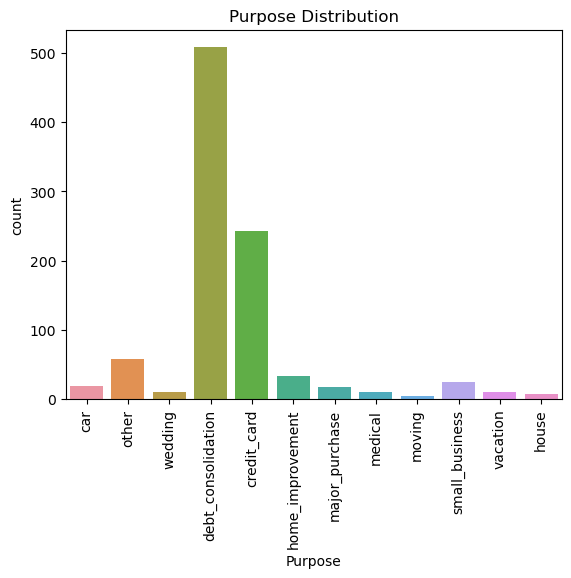

In [15]:
# bar chart (bar charts can be made using categorical data only so I am selecting Purpose column and home ownership coloumn)

sns.countplot(x='Purpose', data=df)
plt.xticks(rotation=90)
plt.title('Purpose Distribution')

The above table shows the common reason for borrowing. From this barchart, we can see people often take loans for debt consolidation and credit cards and these
compromise of more than 70-80% of the data. This shows that most people are taking loans for gaining financial discipline and daily needs. There are also some other categories
like home_improvement, wedding, car_purchases, vacations etc which shows people might take loans for luxuries.

Text(0.5, 1.0, 'Home_Ownership Distribution')

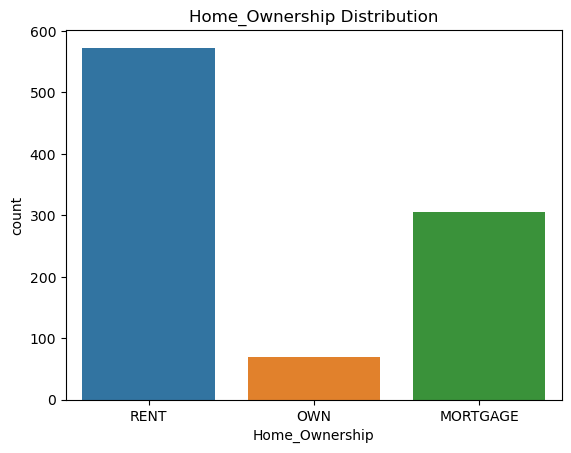

In [16]:
sns.countplot(x='Home_Ownership', data=df)

plt.title('Home_Ownership Distribution')

The above table shows that most of the borrowers lives in rented appartment and very few have their own homes. There is also agood number of people living in mortgage houses.
these dynamics can help lenders to understand the demographics and needs of borrowers.

Text(0.5, 1.0, 'Distribution of Annual Income')

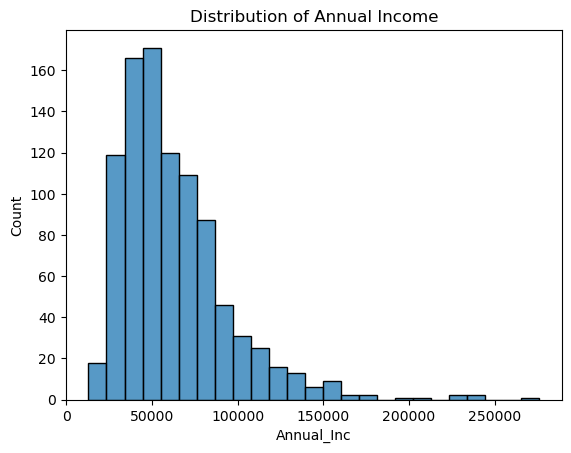

In [17]:
#Histograms (Histograms are made for numerical data with ranges. There are many numerical entries in the data)

sns.histplot(df['Annual_Inc'], kde=False, bins=25)
plt.title('Distribution of Annual Income')

This table shows the distribution of annual income is positively skewed. That is moost of the values liebefore the mean and median values. Mostly people annual salries lies in the bracket of 20,000 to 60,000. This helps lenders in deciding loan plans according to slaries of people. This data also has some outliers like annual income greater than 200k which allows prompts lender to make loan plans for higher bracket salaries. 

### Generating appropriate visualizations for Bivariate analysis

 Generate appropriate visualizations for Bivariate analysis
<br> At least one scatter plot (continuous vs continuous)
<br> At least one visualization for (discrete vs continuous)
<br> One correlation plot


Text(0.5, 1.0, 'Scatter plot of Annual Income and Loan_Amount')

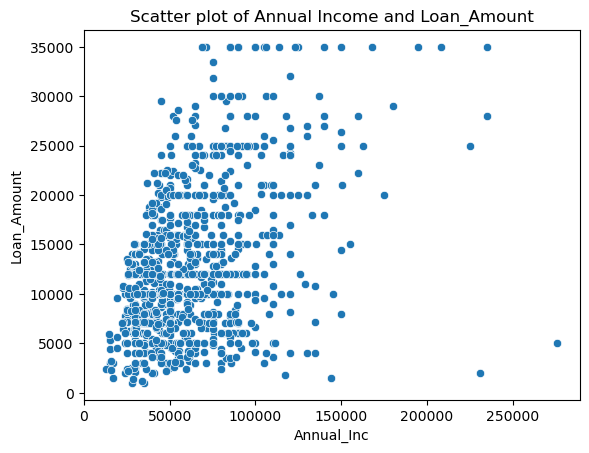

In [18]:
#1. Scatter plot (Continuous vs Continuous)

sns.scatterplot(x='Annual_Inc', y='Loan_Amount', data=df)
# plt.xlim(10000, 250000)
plt.title('Scatter plot of Annual Income and Loan_Amount')

This plot shows that the data is pretty much scattered and there is a very weak coorelation between the two variable. However, we can say that people taking loan_amount proportional to their salary and we see clusters near those amounts. This insight will help banks in creating suitable loan packages for different salary brackets.

Text(0.5, 1.0, 'Boxplot of Purpose and Loan Amount')

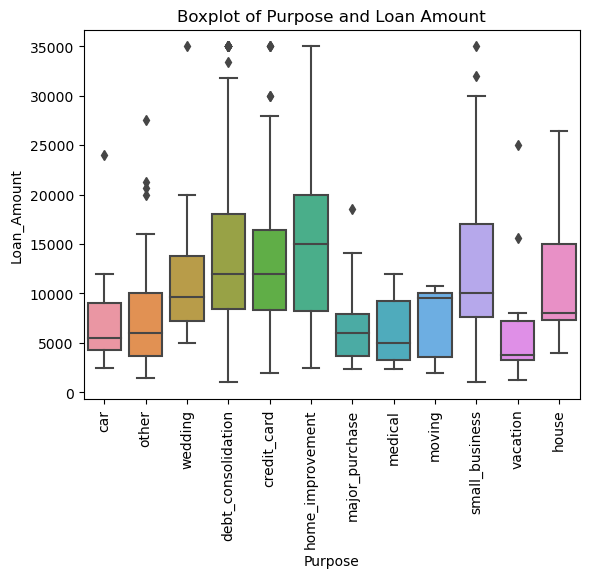

In [19]:
#2. Visualisation (discrete vs Continuous)

sns.boxplot(x='Purpose', y='Loan_Amount', data=df)
plt.xticks(rotation=90)
plt.title('Boxplot of Purpose and Loan Amount')


The boxplot shows the distribution of loan amounts for different loan purposes. the box shows the middle 50% of the data and mean is represented by middle line. Here we
can see that we get higher loan amount for home improvement followed by credit cards and debt consolidation. From this table, we can be aware of the amount that can be lent for a specific purpose
for example, the distribution of loan amounts for home loans is more spread out than the distribution of loan amounts for major_purchase. This means that there is a greater range of loan amounts for home loans.

Text(0.5, 1.0, 'Correlation Plot')

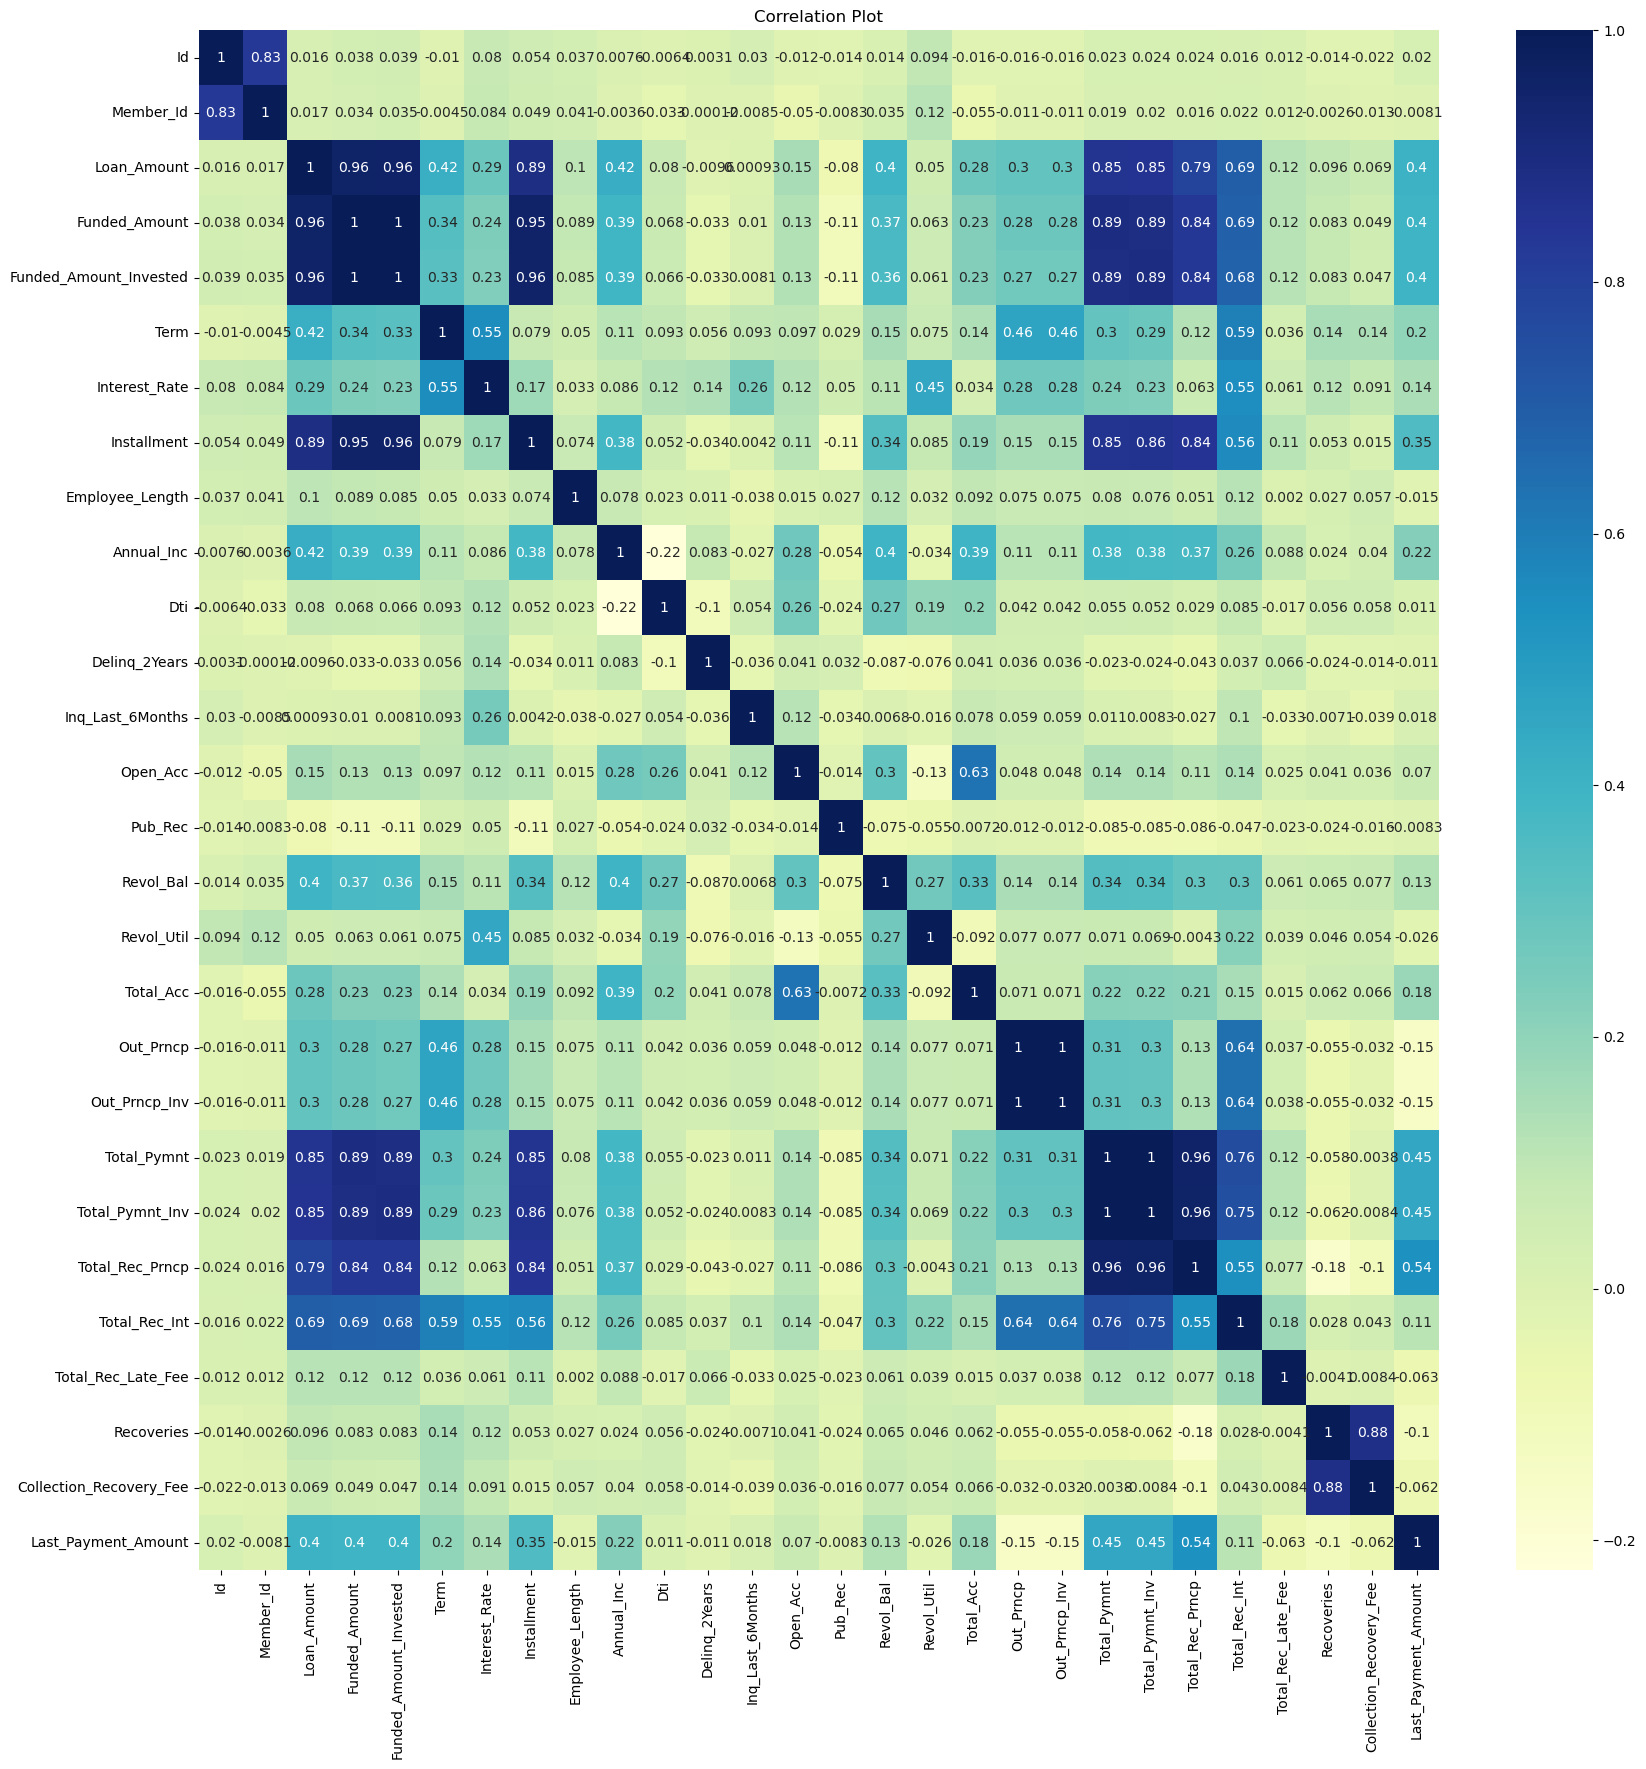

In [20]:
# Correlation plot

plt.figure(figsize = (20,20))
sns.heatmap(df.corr(numeric_only=True),cmap='YlGnBu',annot=True)
plt.title('Correlation Plot')

The visualization's color-coded correlations offer valuable insights into the connections between various variables. The deep blue hues signify positive correlations, indicating that as one variable rises, the other follows suit. For instance, the strong positive correlation between "Installment" and "Total Payment" makes sense, as higher installments naturally lead to greater total payments. Conversely, the pale, whitish colors represent negative correlations, suggesting that as one variable decreases, the other tends to rise. For example, the negative correlation between "Dti" (debt-to-income ratio) and "Annual Income" aligns with expectations—a higher annual income typically results in a lower Dti. Variables with a correlation coefficient of 0 indicate no clear trend or relationship.

### Generate appropriate visualizations for Multivariate analysis

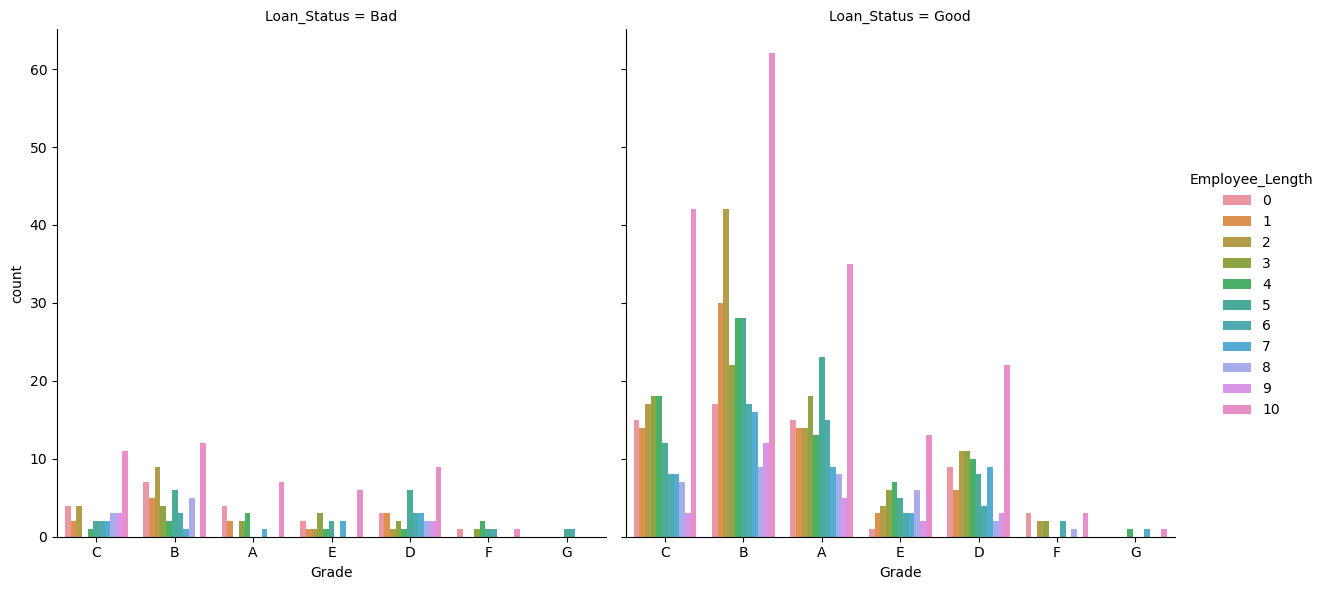

In [21]:
#Multivariate analysis

sns.catplot(x="Grade", hue='Employee_Length', col="Loan_Status" ,data=df,kind = 'count', aspect=1, height=6)


The cat plot between grade, employee length, and loan status shows that the people having higher grades are mostly employeed for more years  and have a very good loan status. Moreover, we can see that  loans in lower grades (E, F, G) are more likely to have a bad status than loans in higher grades (A , B, C). This is because borrowers in lower grades have a poorer credit history and are considered to be higher-risk borrowers.